Question 4

a)  Find the edges in the image using a 2D Fourier transform

In [1]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np

In [4]:
# Loading the image into an array using OpenCV
image = cv2.imread('fruit.jpg')
# converting to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
# Applying a high pass filter to the image to enhance the edges
# performing 2D FT
ft = np.fft.fft2(gray)

# Shifting the zero-frequency component 
# to the center of the spectrum
fshift = np.fft.fftshift(ft)

# Setting up the the low frequency components to 0
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

In [6]:
# Appling inverse FT to convert the
# filtered image into the spatial domain
filtered_image = np.fft.ifftshift(fshift)
filtered_image = np.fft.ifft2(filtered_image)
filtered_image = np.abs(filtered_image)

In [7]:
# creating a binary image (filtere_image --> binary image)
#(the edges are white and the background is black in that image)
_, thresh = cv2.threshold(filtered_image, 15, 255, cv2.THRESH_BINARY)

In [8]:
# Displaying the image 
cv2.imshow('Edge Detection', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

b)  Apply a Gaussian blur to the original image using a 2D Fourier transform

In [14]:
import matplotlib.image as mpimg
import scipy.fftpack as sfft
import scipy.signal as signal
import matplotlib.pyplot as plt

In [15]:
# reads the image
image = mpimg.imread("fruit.jpg")

In [16]:
#creates a Gaussian filter kernel (a two-dimensional array)
gaussian_filter_kernel = np.outer(signal.gaussian(360, 5), signal.gaussian(360, 5))

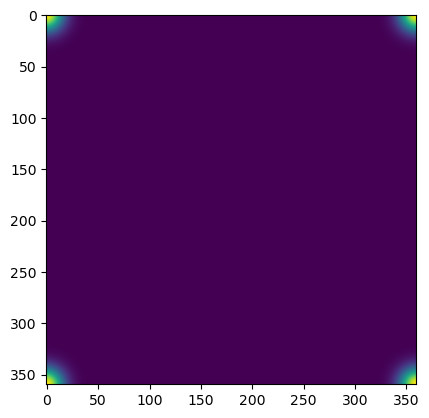

In [17]:
# performs a 2D fft on the kernal 
# converts kernal from the spatial domain to the frequency domain
converted_kernal = sfft.fft2(sfft.ifftshift(gaussian_filter_kernel))  #freq domain kernel
# display freq domain kernal
plt.imshow(np.abs(converted_kernal))
plt.show()

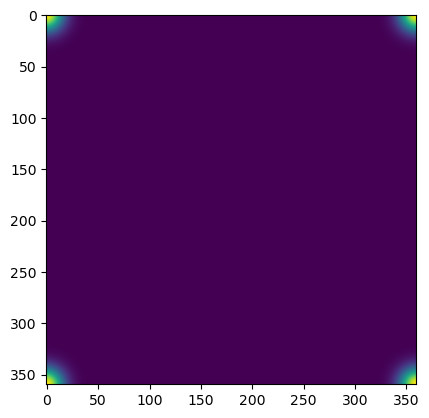

In [18]:
# performs a 2D fft on the image 
fft_on_image = sfft.fft2(image)
# display freq domain image
plt.imshow(np.abs(converted_kernal))
plt.show()

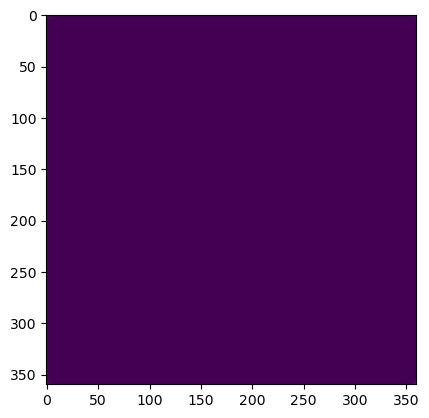

In [19]:
# applies the blur filter to the image
blur_filter_image = fft_on_image*converted_kernal
# displays the blurred frequency domain image
plt.imshow(np.abs(blur_filter_image))
plt.show()

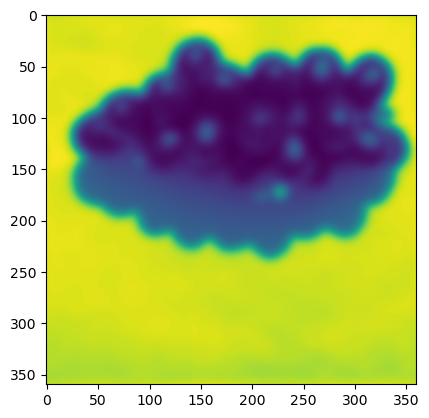

In [20]:
# performs an inverse two-dimensional FFT on the blurred frequency domain image 
# converts the image back to the spatial domain, 
# resulting in a blurred version of the original image
image2 = sfft.ifft2(blur_filter_image)
plt.imshow(np.abs(image2))
plt.show()

c)  Apply DCT to the original image. Scale image to 240px x 240 px using DCT

In [22]:
import matplotlib.image as mpimg
import scipy.fftpack as sfft

In [23]:
# reads the image
image = mpimg.imread("fruit.jpg")

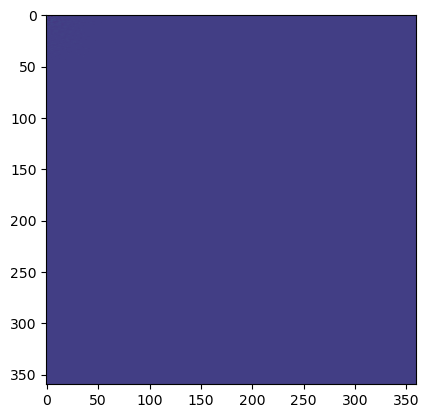

In [24]:
# performs a 2D discrete cosine transform (DCT) on the image 
# converts image from the spatial domain to the frequency domain
# done by decomposing the image into a series of cosine functions
# (each represents a different frequency component of the image)
freq_image = sfft.dct((sfft.dct(image,norm='ortho')).T,norm='ortho')
# display freq domain image
plt.imshow(freq_image)
plt.show()

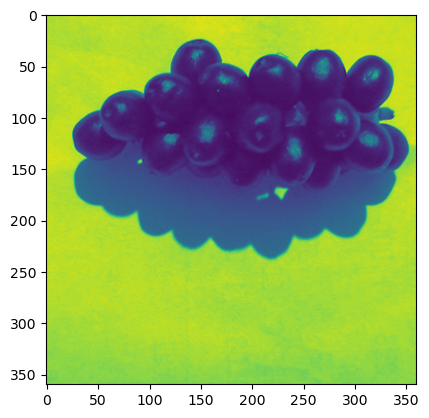

In [25]:
# performs an inverse 2D DCT on the freq domain image
# converts image back to the spatial domain
image_2 = sfft.idct((sfft.idct(freq_image,norm='ortho')).T,norm='ortho')
# display
plt.imshow(image_2)
plt.show()

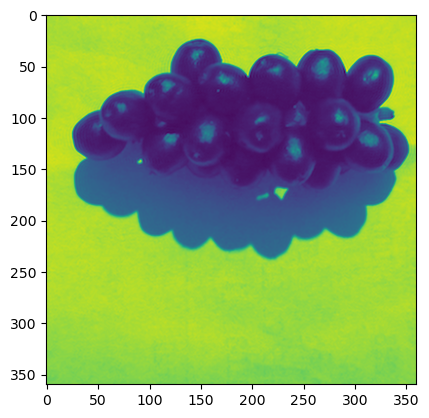

In [26]:
#Removing high frequency components
#creates a new image (is a copy of original freq domain image, but with the high freq components set to 0)
freq_image_2 = np.zeros((360,360))
freq_image_2[:240,:240] = freq_image[:240,:240]
# transform back to the spatial domain using the inverse 2D DCT
image_2 = sfft.idct((sfft.idct(freq_image_2,norm='ortho')).T,norm='ortho')
# display
plt.imshow(image_2)
plt.show()

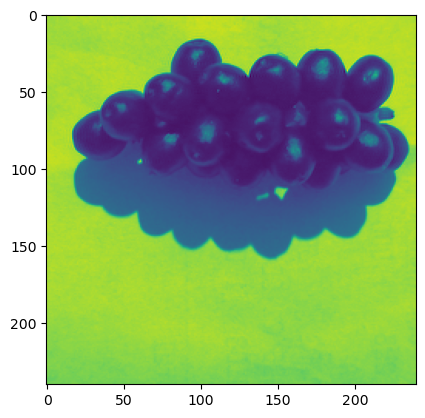

In [27]:
#Scaling
#creates a new image
#  that is a copy of the original frequency domain image
# but with the lower right corner of the image removed
freq_image_3 = freq_image[0:240,0:240]
#transforme back to the spatial domain using the inverse 2D DCT
image_2 = sfft.idct((sfft.idct(freq_image_3,norm='ortho')).T,norm='ortho')
plt.imshow(image_2)
plt.show()

d) Reproduce the common artifacts (ringing and blocking) that occur when an image is compressed.

Before compression


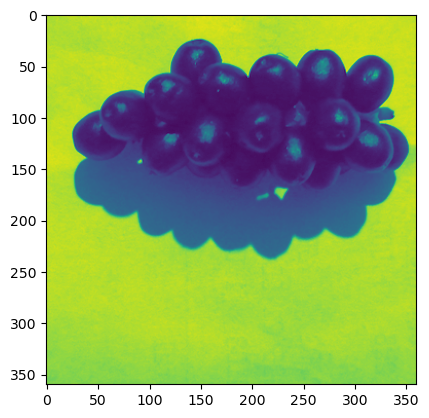

after compression -  Reproduce the common artifacts


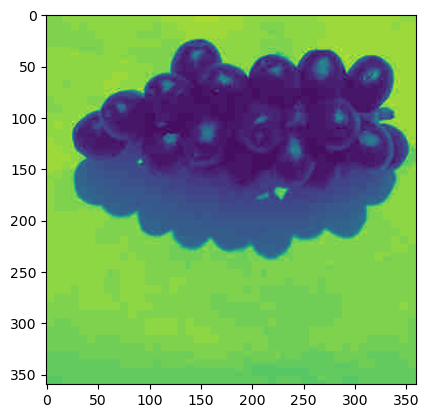

In [30]:
from PIL import Image

# load the image
image = Image.open("fruit.jpg")

# Save the image using lossy compression (set for the low quality)
image.save("compressed.jpg", "JPEG", quality=20)

# Convert the image to a NumPy array
image_array = np.array(image)

print("Before compression")
# Plot the image 
plt.imshow(image_array)
plt.show()

import matplotlib.pyplot as plt
from PIL import Image

# load the compressed image
image = Image.open("compressed.jpg")

# Convert the image to a NumPy array
image_array = np.array(image)

print("after compression -  Reproduce the common artifacts")
# Plot the image 
plt.imshow(image_array)
plt.show()